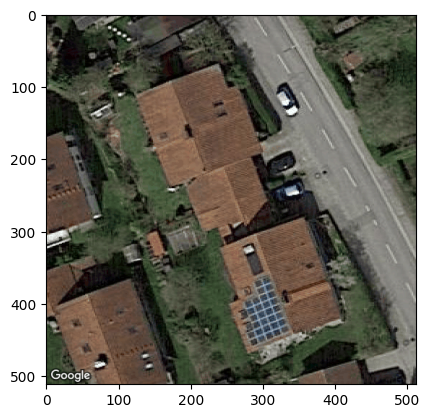

In [11]:
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Notebook is in repo_root/notebooks/
img_path = (
    Path.cwd().parent
    / "data"
    / "images_roof_centered_geotiff"
    / "106.tif"
)

img = np.array(Image.open(img_path))
plt.imshow(img)
plt.show()


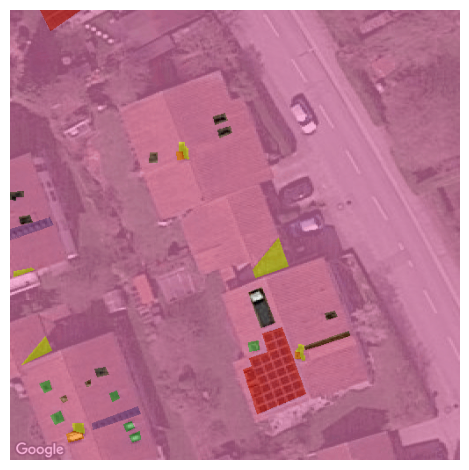

In [13]:
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# class names (0-7)
class_names = [
    'pvmodule', 'dormer', 'window', 'ladder',
    'chimney', 'shadow', 'tree', 'unknown'
]

# colors for classes 0–7
colors = [
    "#e41a1c", "#377eb8", "#4daf4a", "#984ea3",
    "#ff7f00", "#ffff33", "#a65628", "#f781bf"
]
cmap = ListedColormap(colors)

# load paths
img_path = Path.cwd().parent / "data" / "images_roof_centered_geotiff" / "106.tif"
mask_path = Path.cwd().parent / "data" / "masks_superstructures_reviewed" / "106.png"

# load arrays
img = np.array(Image.open(img_path))
mask = np.array(Image.open(mask_path))

# ensure mask same size
if mask.shape[:2] != img.shape[:2]:
    mask = np.array(Image.fromarray(mask).resize(
        (img.shape[1], img.shape[0]), resample=Image.NEAREST))

# -------------------------------------
# Make background transparent
# RID superstructure background = class 7 ("unknown")
# -------------------------------------
alpha = np.where(mask == 7, 0.0, 0.6)   # transparent background, 60% opacity foreground

# -------------------------------------
# Plot overlay
# -------------------------------------
plt.figure()

plt.imshow(img)  # base layer
plt.imshow(mask, cmap=cmap, alpha=alpha, vmin=0, vmax=7)  # overlay
plt.axis('off')

plt.tight_layout()
plt.show()
